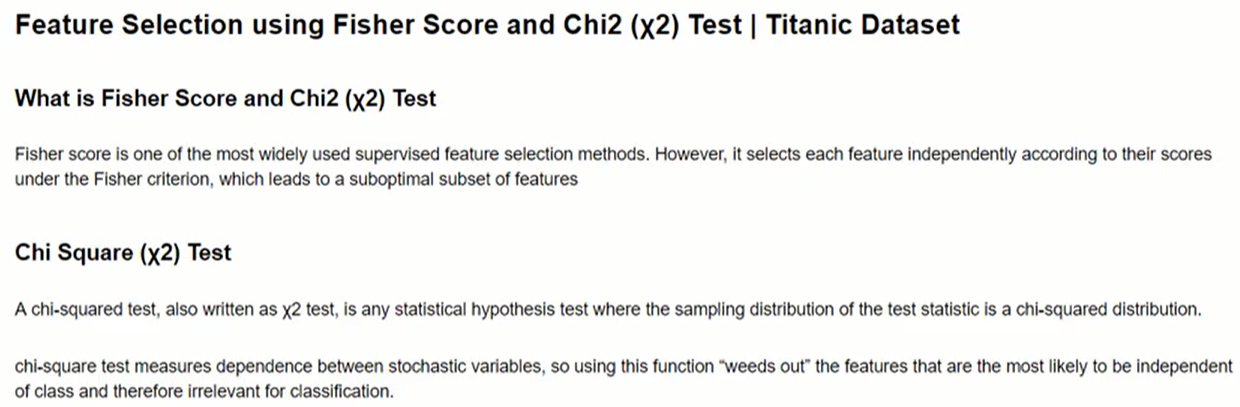

Advantages:
1. only works on categorical variables

In [94]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

In [96]:
titanic = sns.load_dataset('titanic')

In [97]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [98]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [99]:
# Drop variables having null values
titanic.drop(labels=['age','deck'], axis=1, inplace=True)

In [100]:
titanic = titanic.dropna()

In [101]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [102]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   sibsp        889 non-null    int64   
 4   parch        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        889 non-null    object  
 12  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(5)
memory usage: 79.1+ KB


In [103]:
y = titanic['survived']
# Drop variables having null values
titanic.drop(labels=['survived'], axis=1, inplace=True)
titanic.head()

,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


## Categorical Variables
- Categorical variables are values that are selected from a group of categories, also called labels. Examples of categorical variables include gender, which takes values of male and female, or country of birth, which takes values of Argentina, Germany, and so on.

In [104]:
# Identify the categorical variables 
categorical_feature=[feature for feature in titanic if titanic[feature].dtypes=='O'] 
print("categorical Variables Count: {}".format(len(categorical_feature)))

# visualise the categorical variables
data = titanic[categorical_feature]
data.head()

categorical Variables Count: 5


,sex,embarked,who,embark_town,alive
0,male,S,man,Southampton,no
1,female,C,woman,Cherbourg,yes
2,female,S,woman,Southampton,yes
3,female,S,woman,Southampton,yes
4,male,S,man,Southampton,no


In [105]:
# Categorical Variables encoding
sex = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(sex)
embarked = {'S': 0, 'C': 1, 'Q': 2}
data['embarked'] = data['embarked'].map(embarked)
who = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(who)
embark_town = {'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2}
data['embark_town'] = data['embark_town'].map(embark_town)
alive = {'no': 0, 'yes': 1}
data['alive'] = data['alive'].map(alive)
data.head()

C:\Users\dell\AppData\Local\Temp/ipykernel_4312/1346009087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = data['sex'].map(sex)
C:\Users\dell\AppData\Local\Temp/ipykernel_4312/1346009087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['embarked'] = data['embarked'].map(embarked)
C:\Users\dell\AppData\Local\Temp/ipykernel_4312/1346009087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,sex,embarked,who,embark_town,alive
0,0,0,0,0,0
1,1,1,1,1,1
2,1,0,1,0,1
3,1,0,1,0,1
4,0,0,0,0,0


## F-Test

In [106]:
X = data.copy()
X.shape, y.shape

((889, 5), (889,))

In [107]:
# Avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [109]:
f_score = chi2(X_train, y_train)
print("f_score:",f_score) # column 2 -> p_values

f_score: (array([152.91534343,  16.13255653, 161.42431175,  16.13255653,
       444.        ]), array([3.99737147e-35, 5.90599986e-05, 5.52664700e-37, 5.90599986e-05,
       1.45848142e-98]))


In [113]:
# Sort the p_values in asce order
p_values = pd.Series(f_score[1], index=X_train.columns)
p_values.sort_values(ascending=True, inplace=True)
p_values

alive          1.458481e-98
who            5.526647e-37
sex            3.997371e-35
embarked       5.906000e-05
embark_town    5.906000e-05
dtype: float64

<AxesSubplot:>

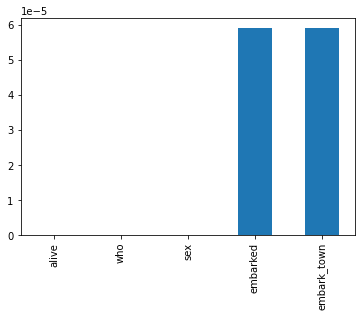

In [114]:
p_values.plot.bar()

In [130]:
# Select least values only -> we can't take alive
X_train_2 = X_train[['who', 'sex']]
X_test_2 = X_test[['who', 'sex']]

In [131]:
X_train_2.shape, X_test_2.shape, X_train.shape

((711, 2), (178, 2), (711, 5))

## Build ML model and compare the performance of the selected features

In [132]:
# Function to calculate random forest ML accuracy
def run_random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))

In [133]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_2, X_test_2, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")


Accuracy: 0.7191011235955056
Time: 1.2961795330047607


In [134]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy: 1.0
Time: 1.293860673904419
